    数据名称示例：
    model_qwen2.5-1.5_outer_model_qwen2.5-14_task_emobench-ea-en_实验一.json
    ：分类模型：qwen2.5B
    ：外部置信度言语评估模型：qwen 14B
    ：任务：emobench-ea-en（数据集/home/ckqsudo/code2024/CKQ_ACL2024/Uncertainty/src/data/emobench-ea.json）
    ：实验类型：实验一
    数据示例
    {
        "response_text": "d", 分类模型评估结果
        "max_prob": 0.6440296173095703, 基于模型内部概率计算的最大置信度概率
        "内部置信度_label": "d", 基于模型内部概率计算的最大置信度概率标签
        "choices_probs": { 模型内部概率计算的置信度概率在答案空间上的分布，（这里的和不一定为1，注意计算的时候需要重新归一化一下）看文件夹下面的图
            "a": 0.0025048956740647554, 
            "b": 0.16188238561153412,
            "c": 0.1858161985874176,
            "d": 0.6440296173095703
        },
        "self_eval_certainty": "  1 ", 语言模型言语评估的置信度，自我评估（qwen2.5b模型自评）
        "outer_eval_certainty": "  6 ", 语言模型言语评估的置信度，外部模型评估（qwen14b模型评估置信度）
        "scores": [
            "0.0",
            "1.0",
            "0.0",
            "0.0"
        ],
        真实数据中对应abcd 四个选项的得分，用于计算平均分，注意，部分题目存在最优解和次优解
        "id": 78
    },


    任务：
    目前，有两种途径计算的置信度，分别为内部置信度和言语置信度（自评和外评）：
    * 计算内部置信度和言语置信度的相关性，在多个参数级别的模型上计算（例如2.5B模型相关性vs14B模型相关性）
    * 计算条件概率（内部\言语置信度和得分的相关性（相互比较）在多个参数级别的模型上比较）
    先计算数，再看看讨论讨论如何画图

|
|
|
|
|
|
-------------------------------




In [2]:
path="/home/ckqsudo/code2024/CKQ_ACL2024/Uncertainty/src/result"
import os
files=[i for i in os.listdir(path) if "实验一.json" in i]
files


['model_qwen2.5-7_outer_model_qwen2.5-32_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-14_outer_model_qwen2.5-7_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-3_outer_model_qwen2.5-7_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-14_outer_model_qwen2.5-32_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-14_outer_model_qwen2.5-3_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-7_outer_model_qwen2.5-3_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-32_outer_model_qwen2.5-14_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-1.5_outer_model_qwen2.5-14_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-7_outer_model_qwen2.5-14_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-3_outer_model_qwen2.5-32_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-14_outer_model_qwen2.5-1.5_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-32_outer_model_qwen2.5-3_task_emobench-ea-en_实验一.json',
 'model_qwen2.5-3_outer_model_qwen2.5-14_task_emobench-ea-en_实验一.json']

In [3]:
import json
def read_file(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        res=json.load(f)
        return res

In [4]:
print(chr(ord("a")))

a


{
        "response_text": "d",
        "max_prob": 0.6440296173095703,
        "内部置信度_label": "d",
        "choices_probs": {
            "a": 0.0025048956740647554,
            "b": 0.16188238561153412,
            "c": 0.1858161985874176,
            "d": 0.6440296173095703
        },
        "self_eval_certainty": "  1 ",
        "outer_eval_certainty": "  6 ",
        "scores": [
            "0.0",
            "1.0",
            "0.0",
            "0.0"
        ],
        "id": 78
    },

In [5]:
"Aaaa 0".strip()

'Aaaa 0'

In [6]:

from sympy import true


counter=0.0
for f in files[:]:
    print(f)
    dt=read_file(path+"/"+f)
    print(len(dt))
    score_counter=0.0
    right_counter=0
    wrong_counter=0
    self_eval_certainty=[0.0,0.0,0.0]
    outer_eval_certainty=[0.0,0.0,0.0]
    for item in dt:
        label=item["max_prob_label"]
        score=float(item["scores"][ord(label)-ord("a")])
        s_certainty=float(item["self_eval_certainty"].strip())
        o_certainty=float(item["outer_eval_certainty"].strip())
        score_counter+=score
        self_eval_certainty[0]+=s_certainty
        outer_eval_certainty[0]+=o_certainty
        if score>0.0:
            right_counter+=1
            self_eval_certainty[1]+=s_certainty
            outer_eval_certainty[1]+=o_certainty
        else:
            wrong_counter+=1
            self_eval_certainty[2]+=s_certainty
            outer_eval_certainty[2]+=o_certainty
    
    
    print("平均分",score_counter/len(dt),"正确个数",right_counter,"错误个数",wrong_counter)
    if right_counter==0 or wrong_counter==0:
        continue
    print("自评言语置信度",self_eval_certainty[0]/len(dt),"自评言语正确置信度",self_eval_certainty[1]/right_counter,"自评言语错误置信度",self_eval_certainty[2]/wrong_counter)
    print("外评言语置信度",outer_eval_certainty[0]/len(dt),"外评言语正确置信度",outer_eval_certainty[1]/right_counter,"外评言语错误置信度",outer_eval_certainty[2]/wrong_counter)
    

model_qwen2.5-7_outer_model_qwen2.5-32_task_emobench-ea-en_实验一.json
100
平均分 0.675 正确个数 93 错误个数 7
自评言语置信度 4.95 自评言语正确置信度 4.89247311827957 自评言语错误置信度 5.714285714285714
外评言语置信度 4.79 外评言语正确置信度 4.806451612903226 外评言语错误置信度 4.571428571428571
model_qwen2.5-14_outer_model_qwen2.5-7_task_emobench-ea-en_实验一.json
100
平均分 0.665625 正确个数 91 错误个数 9
自评言语置信度 5.23 自评言语正确置信度 5.230769230769231 自评言语错误置信度 5.222222222222222
外评言语置信度 4.82 外评言语正确置信度 4.835164835164835 外评言语错误置信度 4.666666666666667
model_qwen2.5-3_outer_model_qwen2.5-7_task_emobench-ea-en_实验一.json
100
平均分 0.585625 正确个数 81 错误个数 19
自评言语置信度 5.0 自评言语正确置信度 4.987654320987654 自评言语错误置信度 5.052631578947368
外评言语置信度 4.61 外评言语正确置信度 4.777777777777778 外评言语错误置信度 3.8947368421052633
model_qwen2.5-14_outer_model_qwen2.5-32_task_emobench-ea-en_实验一.json
100
平均分 0.665625 正确个数 91 错误个数 9
自评言语置信度 5.23 自评言语正确置信度 5.230769230769231 自评言语错误置信度 5.222222222222222
外评言语置信度 4.7 外评言语正确置信度 4.747252747252747 外评言语错误置信度 4.222222222222222
model_qwen2.5-14_outer_model_qwen2.5-3_task_emobench

#### 相关性计算
内部置信度分数和言语置信度分数的相关性

In [17]:
import os
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.preprocessing import MinMaxScaler

def calculate_correlations(data):
    df = pd.DataFrame(data)
    
    # 获取self_eval_certainty和outer_eval_certainty的最大值和最小值
    self_eval_max = df['self_eval_certainty'].str.strip().astype(float).max()
    self_eval_min = df['self_eval_certainty'].str.strip().astype(float).min()
    outer_eval_max = df['outer_eval_certainty'].str.strip().astype(float).max()
    outer_eval_min = df['outer_eval_certainty'].str.strip().astype(float).min()
    
    print(f"自评言语置信度最大值: {self_eval_max}, 最小值: {self_eval_min}")
    print(f"外评言语置信度最大值: {outer_eval_max}, 最小值: {outer_eval_min}")

    # # 最大最小规范化：将原始值映射到[0, 1]区间
    # df['self_eval_certainty'] = (df['self_eval_certainty'].str.strip().astype(float) - self_eval_min) / (self_eval_max - self_eval_min)
    # df['outer_eval_certainty'] = (df['outer_eval_certainty'].str.strip().astype(float) - outer_eval_min) / (outer_eval_max - outer_eval_min)
    scaler = MinMaxScaler()

    df[['max_prob','self_eval_certainty','outer_eval_certainty']] = scaler.fit_transform(df[['max_prob','self_eval_certainty','outer_eval_certainty']])

    # 计算相关性
    correlations = {
        "pearson": {
            "内部置信度 vs 自评言语置信度": pearsonr(df['max_prob'], df['self_eval_certainty'])[0],
            "内部置信度 vs 外评言语置信度": pearsonr(df['max_prob'], df['outer_eval_certainty'])[0],
            "自评言语置信度 vs 外评言语置信度": pearsonr(df['self_eval_certainty'], df['outer_eval_certainty'])[0],
        },
        "spearman": {
            "内部置信度 vs 自评言语置信度": spearmanr(df['max_prob'], df['self_eval_certainty'])[0],
            "内部置信度 vs 外评言语置信度": spearmanr(df['max_prob'], df['outer_eval_certainty'])[0],
            "自评言语置信度 vs 外评言语置信度": spearmanr(df['self_eval_certainty'], df['outer_eval_certainty'])[0],
        },
        "kendall": {
            "内部置信度 vs 自评言语置信度": kendalltau(df['max_prob'], df['self_eval_certainty'])[0],
            "内部置信度 vs 外评言语置信度": kendalltau(df['max_prob'], df['outer_eval_certainty'])[0],
            "自评言语置信度 vs 外评言语置信度": kendalltau(df['self_eval_certainty'], df['outer_eval_certainty'])[0],
        }
    }
    return correlations


results = {}
for f in files:
    data = read_file(path + "/" + f)
    correlations = calculate_correlations(data)
    results[f] = correlations

for filename, correlation in results.items():
    print(f"Correlation Results for file: {filename}")
    print(pd.DataFrame(correlation))
    print("\n")

自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 1.0, 最小值: 1.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 1.0, 最小值: 1.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 2.0
自评言语置信度最大值: 6.0, 最小值: 2.0
外评言语置信度最大值: 6.0, 最小值: 3.0
Correlation Results for file: model_qwen2.5-7_outer_model_qwen2.5-32_task_emobench-ea-en_实验一.json
                     pearson  spearman   kendall
内部置信度 vs 自评言语置信度    0.270833  0.214378  0.174318
内部置信度 vs 外评言语置信度    0.296464  0.237655  0.187627
自评言语置信度 vs 外评言语置信度  0.430717  0.465876  0.432916


Correlation Results for file

/tmp/ipykernel_3700434/4091086928.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "内部置信度 vs 自评言语置信度": pearsonr(df['max_prob'], df['self_eval_certainty'])[0],
/tmp/ipykernel_3700434/4091086928.py:31: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "自评言语置信度 vs 外评言语置信度": pearsonr(df['self_eval_certainty'], df['outer_eval_certainty'])[0],
/tmp/ipykernel_3700434/4091086928.py:34: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "内部置信度 vs 自评言语置信度": spearmanr(df['max_prob'], df['self_eval_certainty'])[0],
/tmp/ipykernel_3700434/4091086928.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "自评言语置信度 vs 外评言语置信度": spearmanr(df['self_eval_certainty'], df['outer_eval_certainty'])[0],
/tmp/ipykernel_3700434/4091086928.py:30: ConstantInputWarning: An input array is constant; the correlation coefficient

各置信度分数与其得分之间的相关性

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.522020
std      0.293045    0.330087
min      0.000000    0.000000
25%      0.250000    0.247475
50%      0.500000    0.494949
75%      0.750000    0.707071
max      1.000000    1.000000


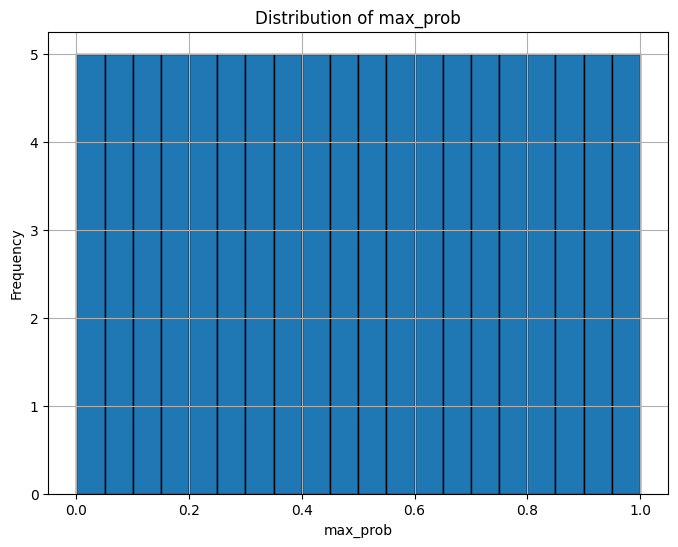

         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.520657
std      0.293045    0.332332
min      0.000000    0.000000
25%      0.250000    0.250000
50%      0.500000    0.494949
75%      0.750000    0.707071
max      1.000000    1.000000


/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


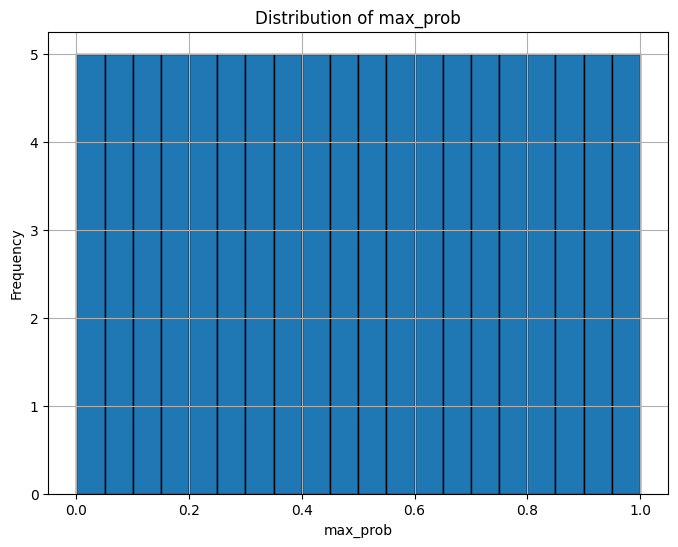

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.495000
std      0.293045    0.336124
min      0.000000    0.000000
25%      0.250000    0.237374
50%      0.500000    0.479798
75%      0.750000    0.777778
max      1.000000    1.000000


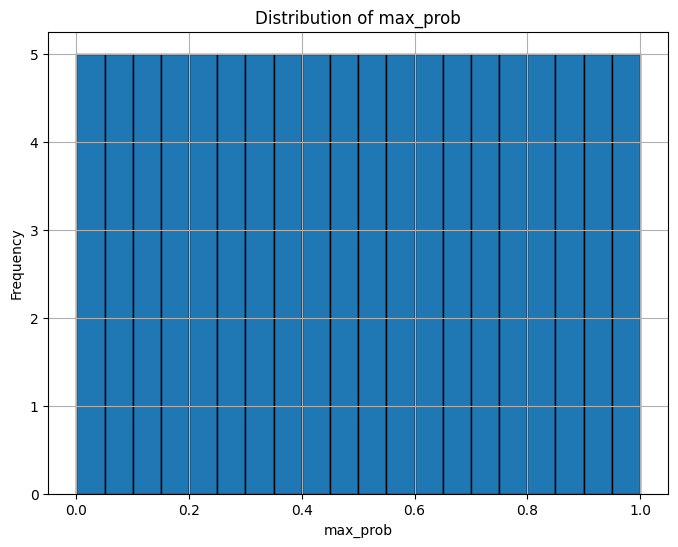

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.520657
std      0.293045    0.332332
min      0.000000    0.000000
25%      0.250000    0.250000
50%      0.500000    0.494949
75%      0.750000    0.707071
max      1.000000    1.000000


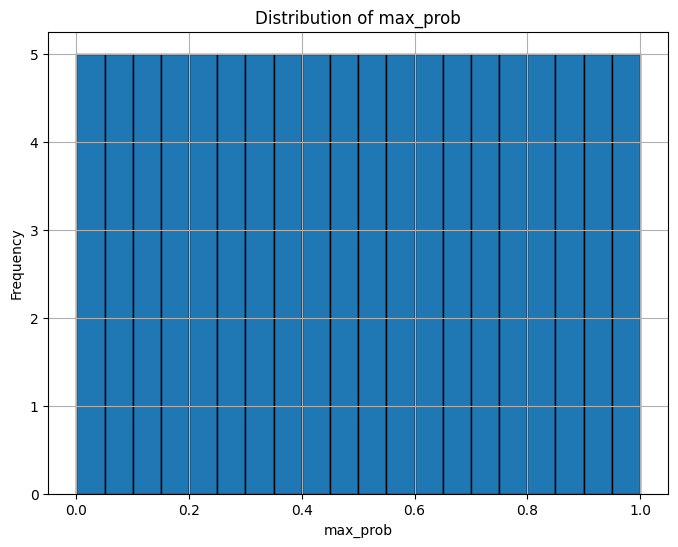

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.520657
std      0.293045    0.332332
min      0.000000    0.000000
25%      0.250000    0.250000
50%      0.500000    0.494949
75%      0.750000    0.707071
max      1.000000    1.000000


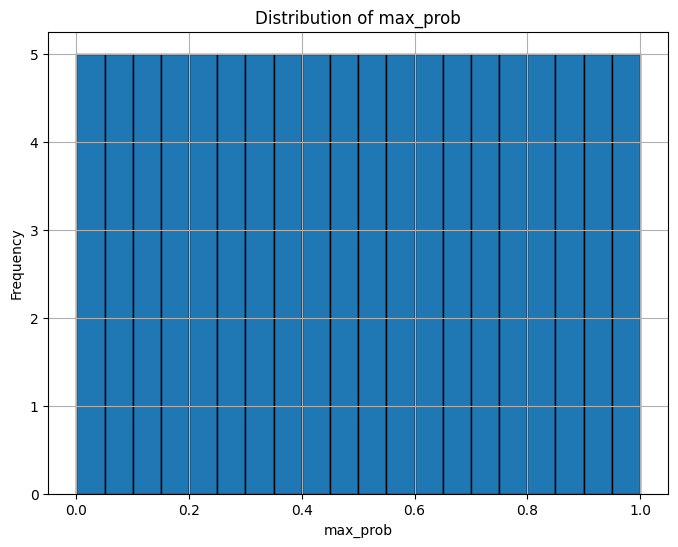

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.522020
std      0.293045    0.330087
min      0.000000    0.000000
25%      0.250000    0.247475
50%      0.500000    0.494949
75%      0.750000    0.707071
max      1.000000    1.000000


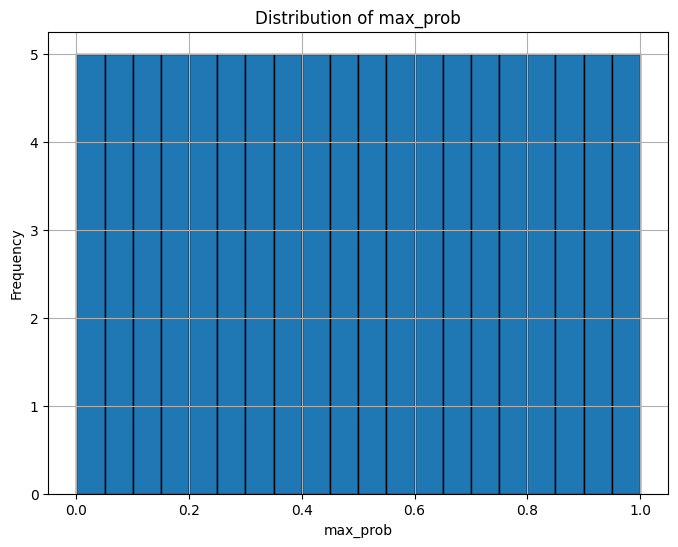

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (101). n_quantiles is set to n_samples.
  warnings.warn(


         max_prob  real_score
count  101.000000  101.000000
mean     0.500000    0.527624
std      0.293001    0.334250
min      0.000000    0.000000
25%      0.250000    0.255000
50%      0.500000    0.490000
75%      0.750000    0.690000
max      1.000000    1.000000


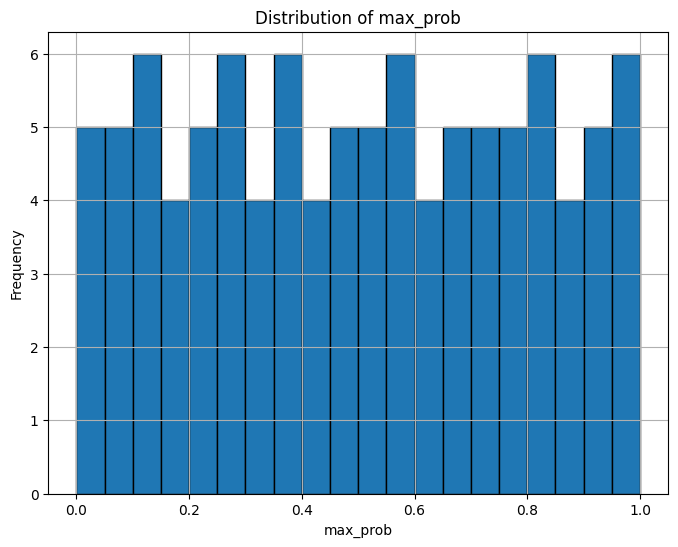

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
/tmp/ipykernel_3700434/1820344249.py:32: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "Pearson": pearsonr(df['self_eval_certainty'], df['real_score'])[0],
/tmp/ipykernel_3700434/1820344249.py:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "Spearman": spearmanr(df['self_eval_certainty'], df['real_score'])[0],


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.483687
std      0.293045    0.352880
min      0.000000    0.000000
25%      0.250000    0.208333
50%      0.500000    0.489899
75%      0.750000    0.782828
max      1.000000    1.000000


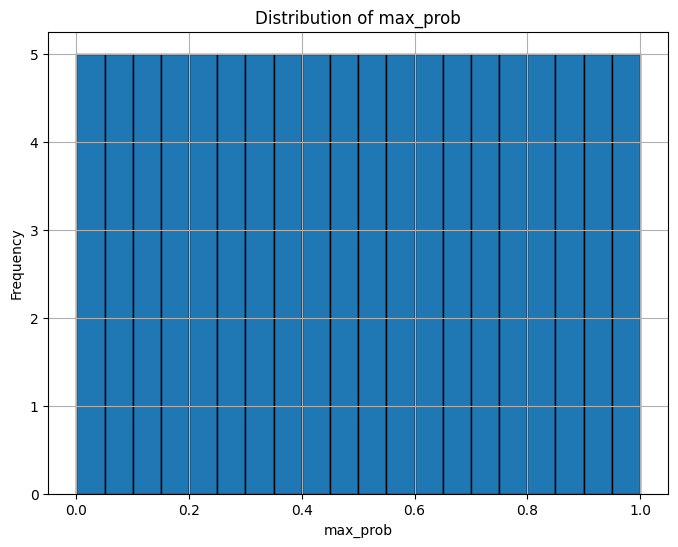

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.522020
std      0.293045    0.330087
min      0.000000    0.000000
25%      0.250000    0.247475
50%      0.500000    0.494949
75%      0.750000    0.707071
max      1.000000    1.000000


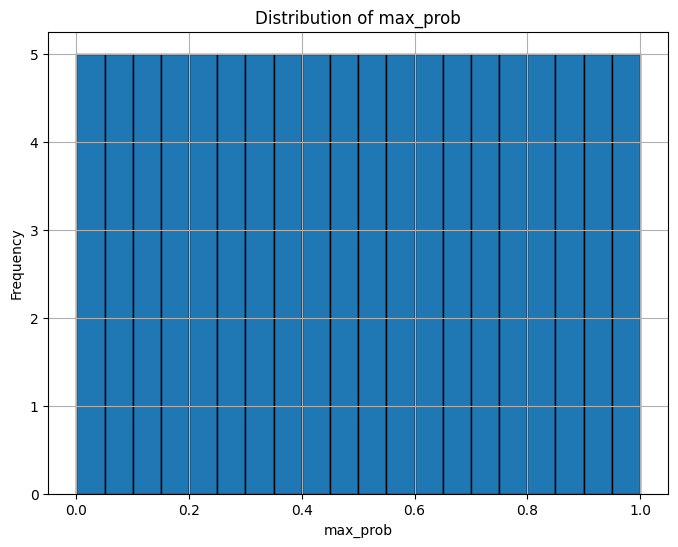

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.495000
std      0.293045    0.336124
min      0.000000    0.000000
25%      0.250000    0.237374
50%      0.500000    0.479798
75%      0.750000    0.777778
max      1.000000    1.000000


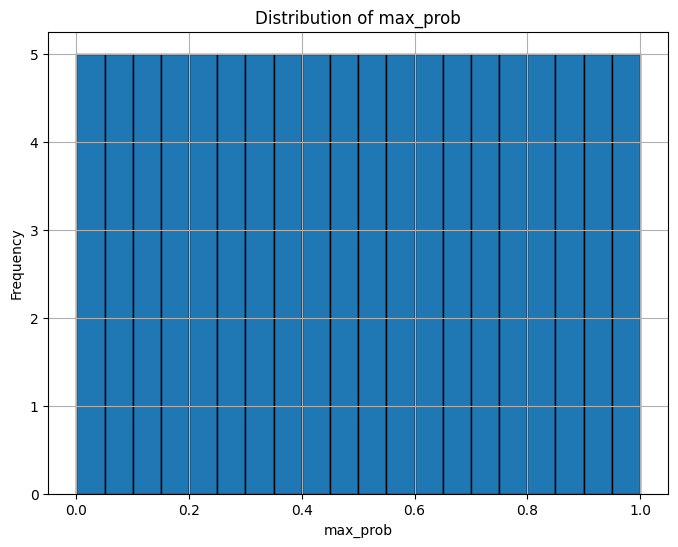

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
/tmp/ipykernel_3700434/1820344249.py:37: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "Pearson": pearsonr(df['outer_eval_certainty'], df['real_score'])[0],
/tmp/ipykernel_3700434/1820344249.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "Spearman": spearmanr(df['outer_eval_certainty'], df['real_score'])[0],


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.520657
std      0.293045    0.332332
min      0.000000    0.000000
25%      0.250000    0.250000
50%      0.500000    0.494949
75%      0.750000    0.707071
max      1.000000    1.000000


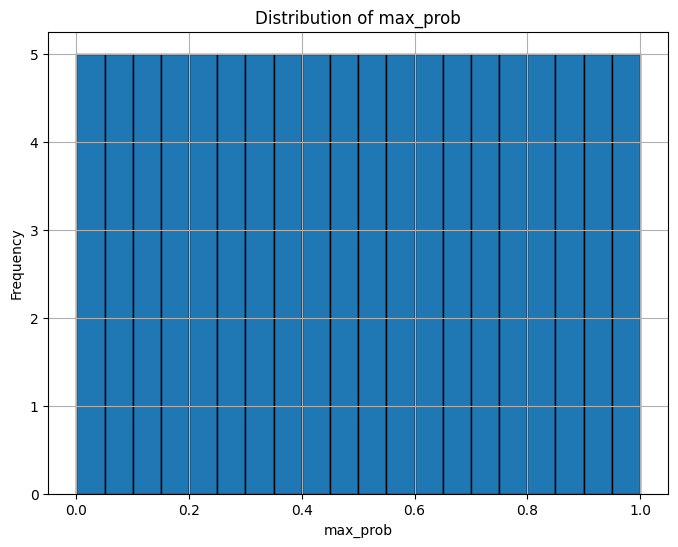

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.526869
std      0.293045    0.335837
min      0.000000    0.000000
25%      0.250000    0.247475
50%      0.500000    0.484848
75%      0.750000    0.765152
max      1.000000    1.000000


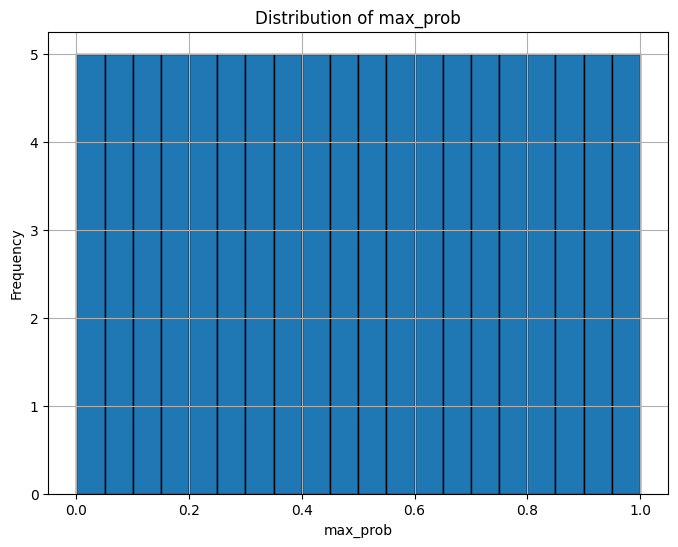

/home/ckqsudo/miniconda3/envs/py11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


         max_prob  real_score
count  100.000000  100.000000
mean     0.500000    0.495000
std      0.293045    0.336124
min      0.000000    0.000000
25%      0.250000    0.237374
50%      0.500000    0.479798
75%      0.750000    0.777778
max      1.000000    1.000000


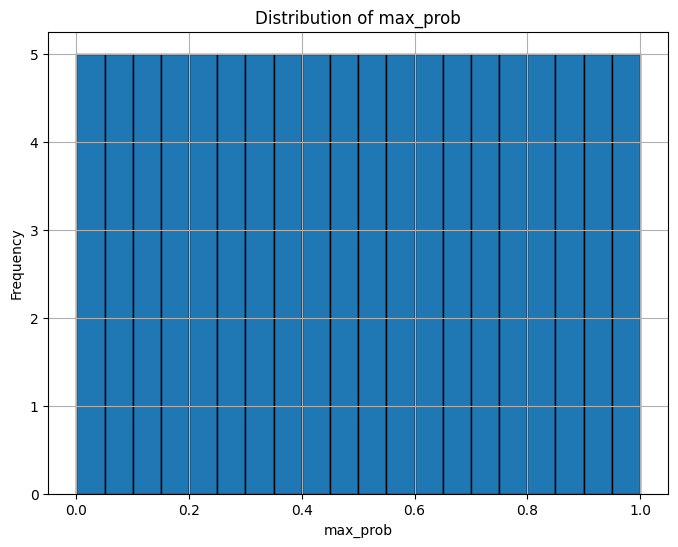

Correlation Results for file: model_qwen2.5-7_outer_model_qwen2.5-32_task_emobench-ea-en_实验一.json
          Pearson  Spearman   Kendall
内部置信度    0.259063  0.271431  0.180632
自评言语置信度  0.079865  0.079642  0.067878
外评言语置信度  0.307220  0.311530  0.253153


Correlation Results for file: model_qwen2.5-14_outer_model_qwen2.5-7_task_emobench-ea-en_实验一.json
          Pearson  Spearman   Kendall
内部置信度    0.303212  0.312392  0.229234
自评言语置信度  0.088522  0.106567  0.088861
外评言语置信度  0.175328  0.188185  0.162231


Correlation Results for file: model_qwen2.5-3_outer_model_qwen2.5-7_task_emobench-ea-en_实验一.json
          Pearson  Spearman   Kendall
内部置信度    0.340404  0.328399  0.237839
自评言语置信度 -0.091728 -0.086052 -0.070616
外评言语置信度  0.344438  0.353858  0.297879


Correlation Results for file: model_qwen2.5-14_outer_model_qwen2.5-32_task_emobench-ea-en_实验一.json
          Pearson  Spearman   Kendall
内部置信度    0.303212  0.312392  0.229234
自评言语置信度  0.088522  0.106567  0.088861
外评言语置信度  0.335017  0.346016  0.2

In [ ]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,QuantileTransformer
def calculate_method_correlations(data):
    df = pd.DataFrame(data)
    
    # 清理并转换为浮点数
    df['self_eval_certainty'] = df['self_eval_certainty'].str.strip().astype(float)
    df['outer_eval_certainty'] = df['outer_eval_certainty'].str.strip().astype(float)

    
    # 转换scores列
    df['scores'] = df['scores'].apply(lambda x: list(map(float, x)))
    
    
    df['real_score'] = df.apply(lambda row: row['scores'][ord(row['max_prob_label']) - ord('a')], axis=1)
    # df['real_score'] = df['real_score'].apply(lambda x: 1 if x > 0.4 else 0)
    # print(f"Real score mean: {df['real_score'].mean()}")

    # 使用MinMaxScaler对数据进行最大最小归一化
    # scaler = MinMaxScaler()
    # scaler = RobustScaler()
    scaler = QuantileTransformer(output_distribution='uniform') 
    # 对max_prob和real_score做归一化
    df[['max_prob','real_score','self_eval_certainty','outer_eval_certainty']] = scaler.fit_transform(df[['max_prob','real_score','self_eval_certainty','outer_eval_certainty']])

    correlations = {
        "内部置信度": {
            "Pearson": pearsonr(df['max_prob'], df['real_score'])[0],
            "Spearman": spearmanr(df['max_prob'], df['real_score'])[0],
            "Kendall": kendalltau(df['max_prob'], df['real_score'])[0],
        },
        "自评言语置信度": {
            "Pearson": pearsonr(df['self_eval_certainty'], df['real_score'])[0],
            "Spearman": spearmanr(df['self_eval_certainty'], df['real_score'])[0],
            "Kendall": kendalltau(df['self_eval_certainty'], df['real_score'])[0],
        },
        "外评言语置信度": {
            "Pearson": pearsonr(df['outer_eval_certainty'], df['real_score'])[0],
            "Spearman": spearmanr(df['outer_eval_certainty'], df['real_score'])[0],
            "Kendall": kendalltau(df['outer_eval_certainty'], df['real_score'])[0],
        },
    }
    print(df[['max_prob', 'real_score']].describe())
    import matplotlib.pyplot as plt
        # 假设 df 已经包含了 'real_score' 列
    plt.figure(figsize=(8, 6))  # 设置图形的大小
    plt.hist(df['max_prob'], bins=20, edgecolor='black')  # bins 设置直方图的条数
    # scaler = RobustScaler()
    plt.title('Distribution of max_prob')  # 标题
    plt.xlabel('max_prob')  # x 轴标签
    plt.ylabel('Frequency')  # y 轴标签
    plt.grid(True)  # 显示网格
    plt.show()  # 显示图形

    return correlations

results = {}

for f in files:
    data = read_file(path + "/" + f)
    correlations = calculate_method_correlations(data)
    results[f] = correlations
    
    
    
for filename, correlation in results.items():
    print(f"Correlation Results for file: {filename}")
    df_result = pd.DataFrame(correlation).T
    print(df_result.to_string(index=True, header=True))
    print("\n")
    # 和分数的相关性就是很低